In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
source("tests.R")
source('cleanup.R')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
air_quality <- read_csv("data/AirQualityDSCI.csv")
head(air_quality)

New names:
• `` -> `...16`
• `` -> `...17`
Rows: 9471 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (13): CO, PT08_S1, NMHC, C6H6(GT), PT08_S2, NOx(GT), PT08_S3, NO2(GT), ...
lgl   (2): ...16, ...17
date  (1): Date
time  (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Time,CO,PT08_S1,NMHC,C6H6(GT),PT08_S2,NOx(GT),PT08_S3,NO2(GT),PT08_S4,PT08_S5,T,RH,AH,...16,...17
<date>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NA,NA
2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NA,NA
2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NA,NA
2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NA,NA
2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NA,NA
2004-03-10,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,NA,NA


In [3]:
air_quality_1 <- mutate(air_quality, date = mdy(Date))
head(air_quality_1)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `date = mdy(Date)`.
Caused by warning:
! All formats failed to parse. No formats found.”


Date,Time,CO,PT08_S1,NMHC,C6H6(GT),PT08_S2,NOx(GT),PT08_S3,NO2(GT),PT08_S4,PT08_S5,T,RH,AH,...16,...17,date
<date>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<date>
2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NA,NA,NA
2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NA,NA,NA
2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NA,NA,NA
2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NA,NA,NA
2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NA,NA,NA
2004-03-10,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,NA,NA,NA


In [4]:
air_quality_2 <- air_quality_1 |>
mutate(year = year(Date),
month = month(Date),
day = day(Date))

head(air_quality_2)

Date,Time,CO,PT08_S1,NMHC,C6H6(GT),PT08_S2,NOx(GT),PT08_S3,NO2(GT),⋯,PT08_S5,T,RH,AH,...16,...17,date,year,month,day
<date>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<date>,<dbl>,<dbl>,<int>
2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,⋯,1268,13.6,48.9,0.7578,NA,NA,NA,2004,3,10
2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,⋯,972,13.3,47.7,0.7255,NA,NA,NA,2004,3,10
2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,⋯,1074,11.9,54.0,0.7502,NA,NA,NA,2004,3,10
2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,⋯,1203,11.0,60.0,0.7867,NA,NA,NA,2004,3,10
2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,⋯,1110,11.2,59.6,0.7888,NA,NA,NA,2004,3,10
2004-03-10,23:00:00,1.2,1197,38,4.7,750,89,1337,96,⋯,949,11.2,59.2,0.7848,NA,NA,NA,2004,3,10


In [5]:
sliced_air_quality <- air_quality_2 |>
slice(1:9357) 


head(sliced_air_quality)

Date,Time,CO,PT08_S1,NMHC,C6H6(GT),PT08_S2,NOx(GT),PT08_S3,NO2(GT),⋯,PT08_S5,T,RH,AH,...16,...17,date,year,month,day
<date>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<date>,<dbl>,<dbl>,<int>
2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,⋯,1268,13.6,48.9,0.7578,NA,NA,NA,2004,3,10
2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,⋯,972,13.3,47.7,0.7255,NA,NA,NA,2004,3,10
2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,⋯,1074,11.9,54.0,0.7502,NA,NA,NA,2004,3,10
2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,⋯,1203,11.0,60.0,0.7867,NA,NA,NA,2004,3,10
2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,⋯,1110,11.2,59.6,0.7888,NA,NA,NA,2004,3,10
2004-03-10,23:00:00,1.2,1197,38,4.7,750,89,1337,96,⋯,949,11.2,59.2,0.7848,NA,NA,NA,2004,3,10


In [6]:
avg_air_quality <- sliced_air_quality |>
filter(PT08_S4 != -200)|>
filter(T != -200) |>
filter(RH != -200) |>
filter(AH != -200) |>
group_by(month, day) |>
summarize(
    daily_avg_PT08_S4 = mean(PT08_S4, na.rm = TRUE),
    daily_avg_T = mean(T, na.rm = TRUE),
    daily_avg_RH = mean(RH, na.rm = TRUE),
    daily_avg_AH = mean(AH, na.rm = TRUE))

avg_air_quality

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,day,daily_avg_PT08_S4,daily_avg_T,daily_avg_RH,daily_avg_AH
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1032.6250,6.870833,50.79583,0.4989708
1,2,1063.1429,6.580952,59.28095,0.5709476
1,5,1425.5217,11.291304,65.86957,0.8814391
1,6,1226.5417,13.445833,61.07083,0.9321417
1,7,1305.6250,8.454167,72.05000,0.7939000
1,8,1304.8750,10.383333,65.75000,0.8240875
1,9,1257.7500,14.437500,58.99583,0.9614458
1,10,1482.9167,13.320833,68.66250,1.0445833
1,11,1449.5000,12.779167,64.10417,0.9414125


In [7]:
num_rows <- nrow(avg_air_quality)
num_rows

[1] 357

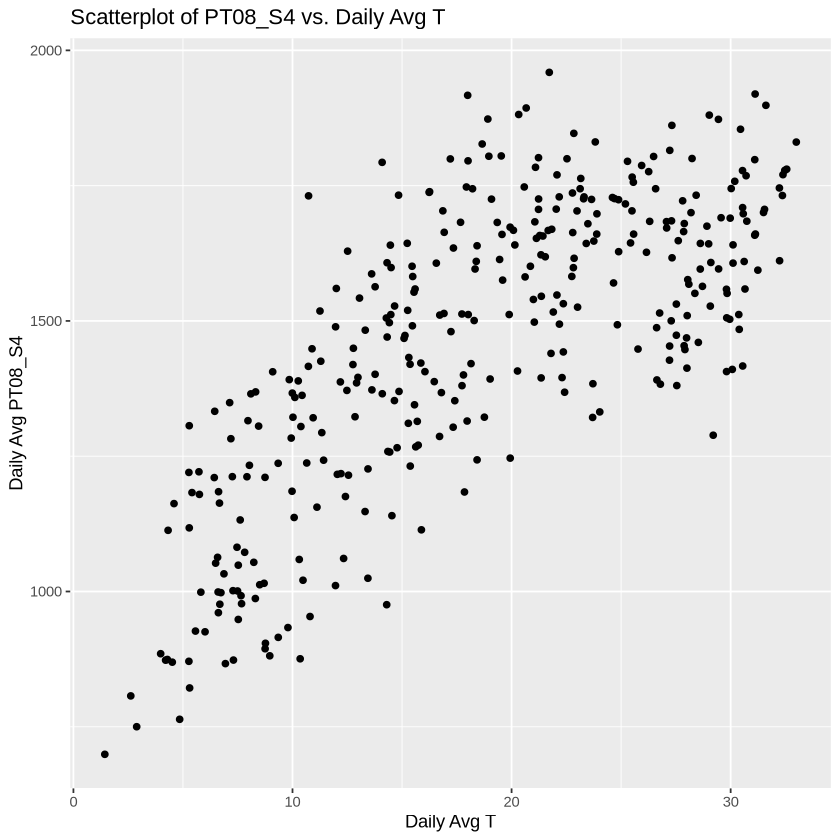

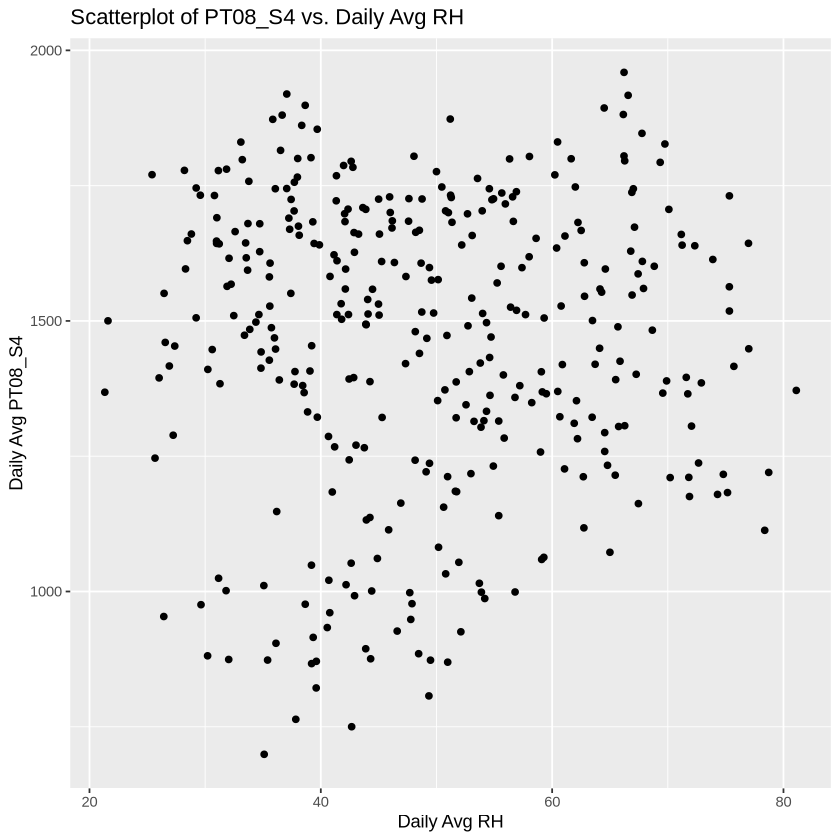

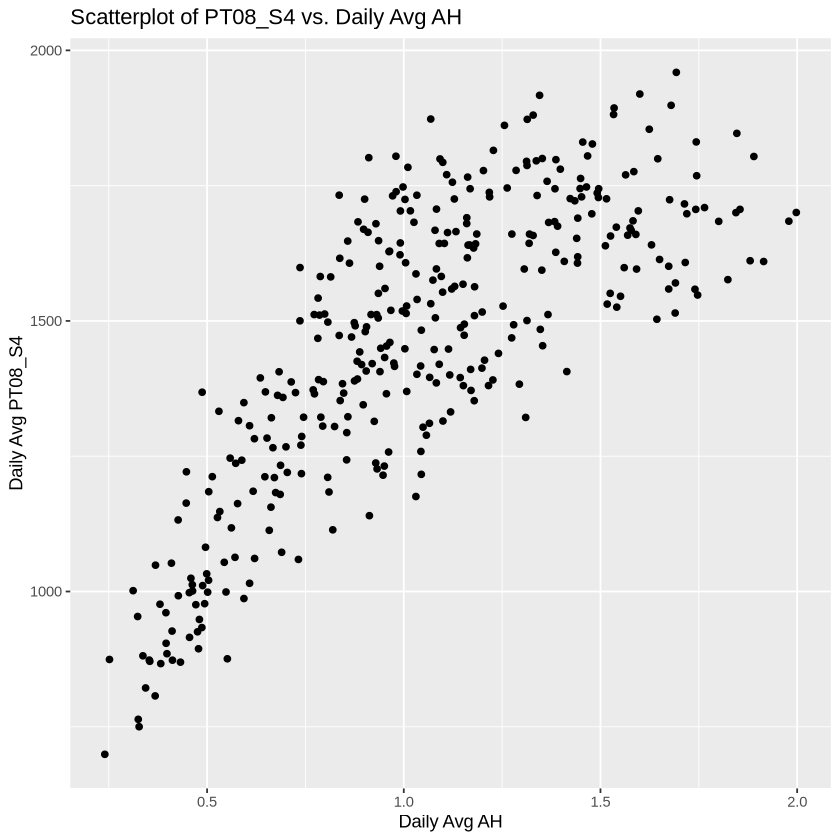

In [8]:
ggplot(avg_air_quality, aes(x = daily_avg_T, y = daily_avg_PT08_S4)) +
  geom_point() +
  labs(title = "Scatterplot of PT08_S4 vs. Daily Avg T",
       x = "Daily Avg T",
       y = "Daily Avg PT08_S4")


ggplot(avg_air_quality, aes(x = daily_avg_RH, y = daily_avg_PT08_S4)) +
  geom_point() +
  labs(title = "Scatterplot of PT08_S4 vs. Daily Avg RH",
       x = "Daily Avg RH",
       y = "Daily Avg PT08_S4")


ggplot(avg_air_quality, aes(x = daily_avg_AH, y = daily_avg_PT08_S4)) +
  geom_point() +
  labs(title = "Scatterplot of PT08_S4 vs. Daily Avg AH",
       x = "Daily Avg AH",
       y = "Daily Avg PT08_S4")